In [1]:
import functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
def get_hypnogram(hypno_str, ax = None):
    """
    Description
    -----------
    This function plot a hypnogram with same design as the Oura Ring sleep stage dashboard.

    Parameters
    ----------
    hypno_str : <str>
        A string that contains one character for each starting five minutes of the sleep period, so that the first period starts from sleep.bedtime.start
        '1'= deep (N3) sleep, '2'= light (N1 or N2) sleep, '3'= REM sleep, '4'= awake    

    Returns
    -------
    ax : <class 'matplotlib.axes._subplots.AxesSubplot'>
        Plotted hypnogram with integer index in the x-axis.
    """
    
    # Values changed to: '3'= deep (N3) sleep, '2'= light (N1 or N2) sleep, '1'= REM sleep, '0' = awake
    hypno = pd.Series([int(elem) for elem in hypno_str]).map({1: 3, 2: 2, 3: 1, 4: 0}).values
    
    # Sampling frequency of the hypnogram
    sf_hypno= 1/(5*60)
    bins = np.arange(hypno.size + 1) / (sf_hypno * 3600)
    
    # Take the points where there is a change of state
    change_points = np.nonzero(np.ediff1d(hypno, to_end=1))
    bins = np.append(0, bins[change_points])

    # Take the right edges of the hypnogram 
    hypno = hypno[change_points]
    
    # Split the data into each state with the corresponding collor
    hypno_split = []
    hypno_split.append((np.ma.masked_not_equal(hypno, 0), "#d1d5db")) # Hypno Awake
    hypno_split.append((np.ma.masked_not_equal(hypno, 1), "#72ccff")) # Hypno REM
    hypno_split.append((np.ma.masked_not_equal(hypno, 2), "#448dc2")) # Hypno N1 & N2
    hypno_split.append((np.ma.masked_not_equal(hypno, 3), "#24477b")) # Hypno N3
    
    # Start the plot
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=(7, 3), constrained_layout=True)
        ax = plt.gca()
    
    # Draw Hypnogram lines
    for i, stage in enumerate(hypno_split):
        ax.hlines(-1 * stage[0], xmin=bins[:-1], xmax=bins[1:], color=stage[1], lw=30)
        ax.axhline(y=-(i + 0.5), xmin=0, xmax=1, lw=0.5, color='black',linestyle='-.')
        
    # Adjust Global parameters
    ax.set_yticks([0, -1, -2, -3])
    ax.set_yticklabels(["Awake", "REM", "N1/N2", "N3"])
    ax.set_ylim(-3.5, 0.5)
    ax.set_xlim(0, bins.max())
    ax.set_ylabel("Stage")
    ax.set_xlabel("Time [hrs]")
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)    

    return ax

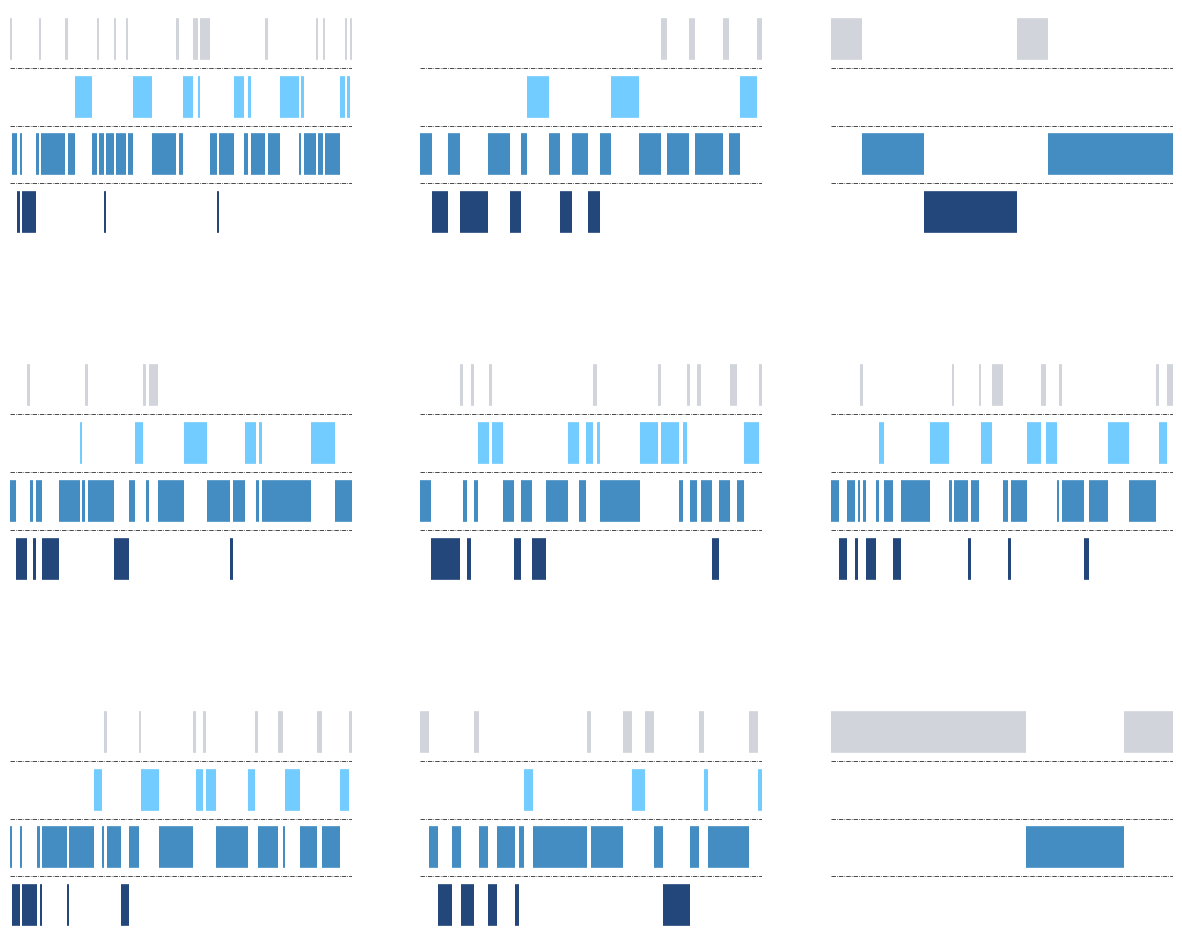

In [38]:
sleep_data, heart_data = functions.data_request(start = '2023-09-29', end = '2023-10-09')

# Define subplot grid
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

i = 0
for row in axs:
    for column in row:
    
        hypno_str = sleep_data.json()['data'][i]['sleep_phase_5_min']
        ax = get_hypnogram(hypno_str, column)

        ax.get_xaxis().set_visible(False) 
        ax.get_yaxis().set_visible(False)
        ax.set_axis_off()
        #ax.get_legend().remove()
        #ax.set_xlabel("")
        i += 1
    #axs[i].add_subplot(ax)

#plt.tight_layout()   
plt.show()

In [44]:
sleep_data.json()['data'][8]

{'id': 'ea0ea896-706e-41cd-b941-75334081c79a',
 'average_breath': 14.625,
 'average_heart_rate': 55.75,
 'average_hrv': None,
 'awake_time': 1560,
 'bedtime_end': '2023-10-05T21:51:03-03:00',
 'bedtime_start': '2023-10-05T21:15:03-03:00',
 'day': '2023-10-06',
 'deep_sleep_duration': 0,
 'efficiency': 28,
 'heart_rate': None,
 'hrv': None,
 'latency': 1500,
 'light_sleep_duration': 600,
 'low_battery_alert': False,
 'lowest_heart_rate': 255,
 'movement_30_sec': '123233333222122122122332112211111111211111112111111111111111111111111111',
 'period': 0,
 'readiness': {'contributors': {'activity_balance': 49,
   'body_temperature': 0,
   'hrv_balance': 75,
   'previous_day_activity': 66,
   'previous_night': 0,
   'recovery_index': 0,
   'resting_heart_rate': 0,
   'sleep_balance': 66},
  'score': 67,
  'temperature_deviation': None,
  'temperature_trend_deviation': 0.13},
 'readiness_score_delta': None,
 'rem_sleep_duration': 0,
 'restless_periods': 4,
 'sleep_phase_5_min': '44444224',
 's